## <center>Predict whether the Employee of an Organization should get Promotion or Not?</center>

&nbsp;

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:
    * They first identify a set of employees based on recommendations/ past performance.
    * Selected employees go through the separate training and evaluation program for each vertical. These programs are based on he required skill of each vertical
    * At the end of the program, based on various factors such as training performance, an employee gets the promotion

![image](https://corehr.files.wordpress.com/2013/02/wrong-promotion1.jpg?w=290)

## Importing all the Required Libraries

* We Import Numpy, Pandas, Matplot, and Seaborn for Data Analysis and Visualizations
* We import ipywidgets, Sweetviz, ppscore for Exploratory Data Analysis
* We Import Sklearn, Imblearn for Machine Learning Modelling

In [1]:
# lets import all the required libraries

# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for machine learning
import sklearn
import imblearn

# setting up the size of the figures
plt.rcParams['figure.figsize'] = (16, 8)
# setting up the style of the plot
plt.style.use('fivethirtyeight')

# ignoring all warnings
from warnings import filterwarnings
filterwarnings('ignore')

## Reading the Dataset

* Here, we are having two datasets, i.e., Training and Testing Datasets
* We will read both the datasets 
* Training Datasets is used to train the Machine learning Models
* After learning the patterns from the Testing Datasets, We have to predict the Target Variable.

In [2]:
# reading the datasets

train = pd.read_csv('train (1).csv')
test = pd.read_csv('test (1).csv')

## Examining the Data

* This is an Important Step in Data Science and Machine Learning to ensure about the columns, and rows present.
* First, we will check the shape of the dataset
* Second, we will check the head, tail, and sample of the datasets
* Third, we will check the Data Description
* Then, we will check the Data Types of the columns present in the data.
* Atlast, we will check the Target Class Balance

In [3]:
# lets check the shape of the train and test datasets
print("Shape of the Training Data :", train.shape)
print("Shape of the Test Data :", test.shape)

Shape of the Training Data : (54808, 14)
Shape of the Test Data : (23490, 13)


In [4]:
# columns in Training Data
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [5]:
# checking the dtypes
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [6]:
# columns in Testing Data
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [7]:
# checking the dtypes
test.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [8]:
# lets check the head of the dataset
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [9]:
# lets check the head of the test data
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [10]:
# lets also check the tail of the test data
train.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [11]:
# lets also check the tail of the test data
test.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


## <center>Data Description</center>

<table>
    <tr>
        <td><b>Variable</b></td>
        <td><b>Definition</b></td>
    </tr>
    <tr>
        <td>employee_id</td>
        <td>Unique ID for employee<td>
    </tr>
    <tr>
        <td>department</td>
        <td>Department of employee</td>
    </tr>
    <tr>
        <td>region</td>
        <td>Region of employment (unordered)</td>
    </tr>
    <tr>
        <td>education</td>
        <td>Education Level</td>
    </tr>
    <tr>
        <td>gender</td>
        <td>Gender of Employee</td>
    </tr>
    <tr>
        <td>recruitment_channel</td>
        <td>Channel of recruitment for employee</td>
    </tr>
    <tr>
        <td>no_of_trainings</td>
        <td>no of other trainings completed in previous year on soft skills, technical skills etc.</td>
    </tr>
    <tr>
        <td>age</td>
        <td>Age of Employee</td>
    </tr>
    <tr>
        <td>previous_year_rating</td>
        <td>Employee Rating for the previous year</td>
    </tr>
    <tr>
        <td>length_of_service</td>
        <td>Length of service in years</td>
    </tr>
    <tr>
        <td>KPIs_met >80%</td>
        <td>if Percent of KPIs(Key performance Indicators) >80% then 1 else 0</td>
    </tr>
    <tr>
        <td>awards_won?</td>
        <td>if awards won during previous year then 1 else 0</td>
    </tr>
    <tr>
        <td>avg_training_score</td>
        <td>Average score in current training evaluations</td>
    </tr>
    <tr>
        <td>is_promoted	(Target)</td>
        <td>Recommended for promotion</td>
    </tr>
</table>

In [12]:
# values in Departments
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [13]:
# values in Region
train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

## Descriptive Statistics

* Descriptive Statistics is one of the most Important Step to Understand the Data and take out Insights
* First we will the Descriptive Statistics for the Numerical Columns
* for Numerical Columns we check for stats such as Max, Min, Mean, count, standard deviation, 25 percentile, 50 percentile, and 75 percentile.
* Then we will check for the Descriptive Statistics for Categorical Columns
* for Categorical Columns we check for stats such as count, frequency, top, and unique elements.

In [14]:
# lets check descriptive statistics for numerical columns
train.describe().style.background_gradient(cmap = 'copper')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


* It is quite clear that we are not having Outliers in our Dataset, the average training score for most of the Employee lie between 40 to 100, which is a very good distribution, also th mean is 50.

* Also, the Length of service, is not having very disruptive values, so we can keep them for model training. they are not going to harm us a lot.

In [16]:
# lets check descriptive statistics for categorical columns
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


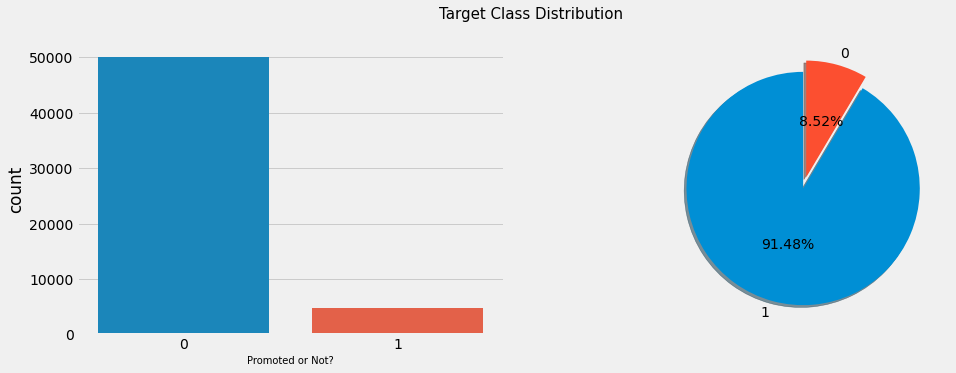

In [17]:
# lets check the Target Class Balance

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Distribution', fontsize = 15)
plt.show()

* We can easily see that, the target class is highly imbalanced, and we must balance these classes. Most of the times, when we use Machine Learning Models with imbalanced classes, we have very poor results which are completely biased towards the majority class.

## Treatment of Missing Values

* Treatment of Missing Values is very Important Step in any Machine Learning Model Creation 
* Missing Values can be cause due to varios reasons such as the filling incomplete forms, values not available, etc
* There are so many types of Missing Values such as 
     * Missing values at Random
     * Missing values at not Random
     * Missing Values at Completely Random
* What can we do to Impute or Treat Missing values to make a Good Machine Learning Model
    * We can use Business Logic to Impute the Missing Values
    * We can use Statistical Methods such as Mean, Median, and Mode.
    * We can use ML Techniques to impute the Missing values
    * We can delete the Missing values, when the Missing values percentage is very High.
    
* When to use Mean, and when to use Median?
    * We use Mean, when we do not have Outliers in the dataset for the Numerical Variables.
    * We use Median, when we have outliers in the dataset for the Numerical Variables.
    * We use Mode, When we have Categorical Variables.

In [18]:
# missing values in training data set

# lets calculate the total missing values in the dataset
train_total = train.isnull().sum()

# lets calculate the percentage of missing values in the dataset
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2)

# lets calculate the total missing values in the dataset
test_total = test.isnull().sum()

# lets calculate the percentage of missing values in the dataset
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)

# lets make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
train_missing_data = pd.concat([train_total, train_percent, test_total, test_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)

# lets check the head
train_missing_data.style.bar(color = ['gold'])

,Train_Total,Train_Percent %,Test_Total,Test_Percent %
KPIs_met >80%,0,0.000000,0.000000,0.000000
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,2409,4.400000,1034.000000,4.400000
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,0.000000,nan,nan
length_of_service,0,0.000000,0.000000,0.000000


* We can see from the above table, that Only two columns have missing values in Train and Test Dataset both. Also, the Percentage of Missing values is around 4% and 8% in education, and previous_year_rating respectively. So, do not have delete any missing values, we can simply impute the values using Mean, Median, and Mode Values. 

In [19]:
# lets impute the missing values in the Training Data
train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [20]:
# lets impute the missing values in the Testing Data
test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", test.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


* We imputed the missing values, using the Mode values, even for the previous year rating, it only seems to be numerical, but in real it's also categorical.

* After, Imputing the missing values in the training and testing data set we can see that there are no Null Values left in any of the datasets.

* So, we are Done with the Treatment of the Missing Values.

## Outlier Detection

The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance. Instead, automatic outlier detection methods can be used in the modeling pipeline and compared, just like other data preparation transforms that may be applied to the dataset.

In [21]:
# Lets first analyze the Numberical Columns
train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


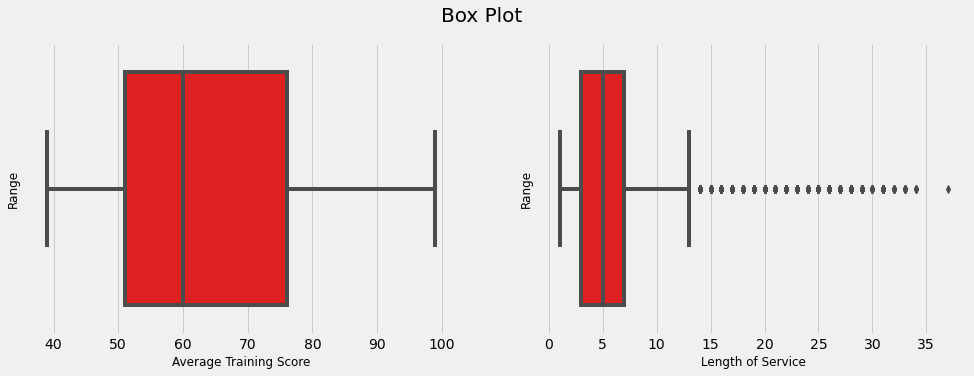

In [22]:
# lets check the boxplots for the columns where we suspect for outliers
# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

* Here, the Box plot, helps us to analyze the middle 50 percentile of the data, and we can clearly check the minimum, maximum, median, and outlier values.

* In the Length of service attribute, we can see some points after the Max Value, which can be termed to be as Outliers. We need to remove these values, as the values are far and huge.

* We, also check the distribution of these attributes after checking the Box Plot so that we can be more clear about the Values present in these columns.

In [23]:
# lets remove the outliers from the length of service column
train = train[train['length_of_service'] < 13]

In [24]:
# reseting the index
train.reset_index(inplace = True, drop = True)

In [25]:
# checking the shape of train data, after removing the outliers
train.shape

(50632, 14)

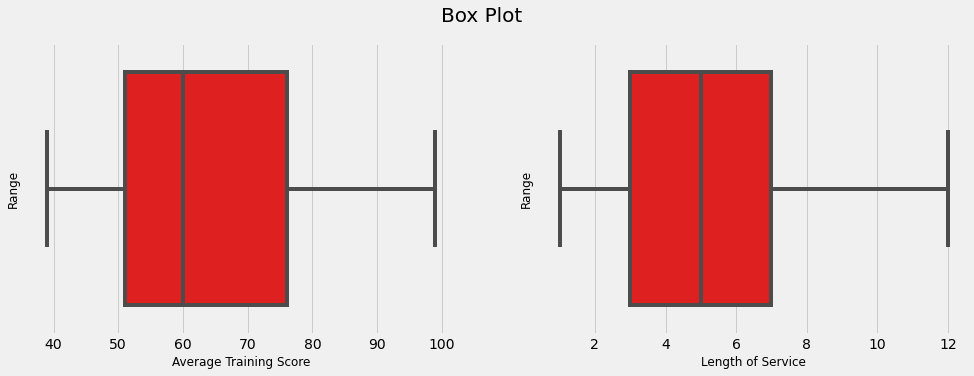

In [26]:
# lets check the boxplots for the columns where we suspect for outliers
# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

* As we can see there are no outliers left in Length of Service column now.

## Univariate Analysis

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.

* This is an Essential step, to understand the variables present in the dataset one by one.
* First, we will check the Univariate Analysis for Numerical Columns to check for Outliers by using Box plots.
* Then, we will use Distribution plots to check the distribution of the Numerical Columns in the Dataset.
* After that we will check the Univariate Analysis for Categorical Columns using Pie charts, and Count plots.
* We Use Pie charts, when we have very few categories in the categorical column, and we use count plots we have more categorises in the dataset.

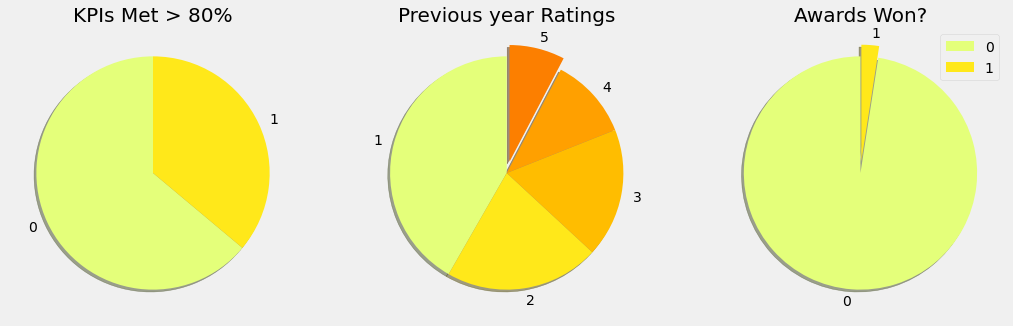

In [27]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = ['0','1']
sizes = train['KPIs_met >80%'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('KPIs Met > 80%', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)


plt.legend()
plt.show()

* We, can see that there are some pie charts we have for representing KPIs, Previous year Ratings, and Awards Won?

* Also, The one Big Pattern is that only some of the employees could reach above 80% of KPIs set.
* Most of the Employees have a very low rating for the previous year, and very few employees, probably 2% of them could get awards for their work, which is normal.

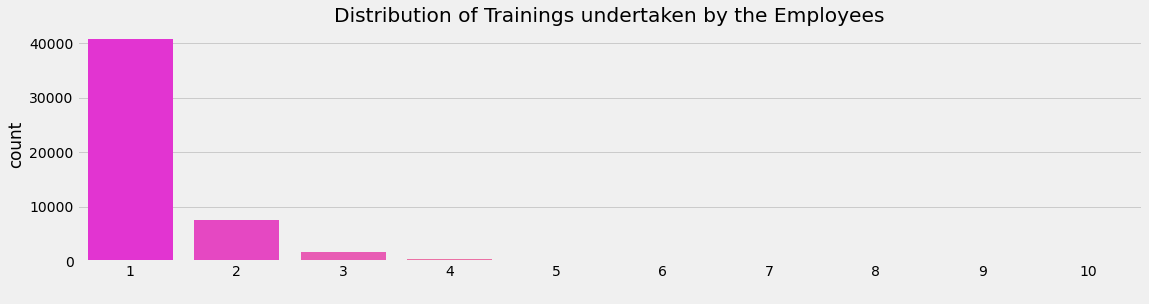

In [28]:
# lets check the distribution of trainings undertaken by the employees
plt.rcParams['figure.figsize'] = (17, 4)
sns.countplot(train['no_of_trainings'], palette = 'spring')
plt.xlabel(' ', fontsize = 14)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

* The above Countplot, where we are checking the distribution of trainings undertaken by the employees. It is clearly visible that 80% of the employees have taken the training only once, and there are negligible numbers of employees, who took trainings more than thrice.

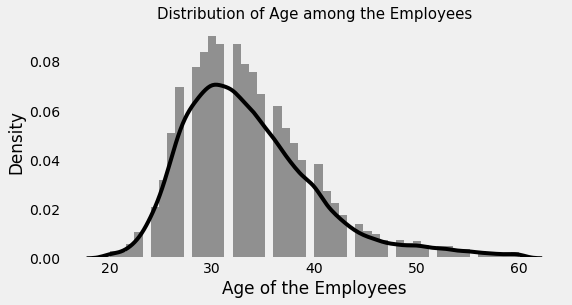

In [29]:
# lets check the Age of the Employees
plt.rcParams['figure.figsize'] = (8, 4)
sns.distplot(train['age'], color = 'black')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

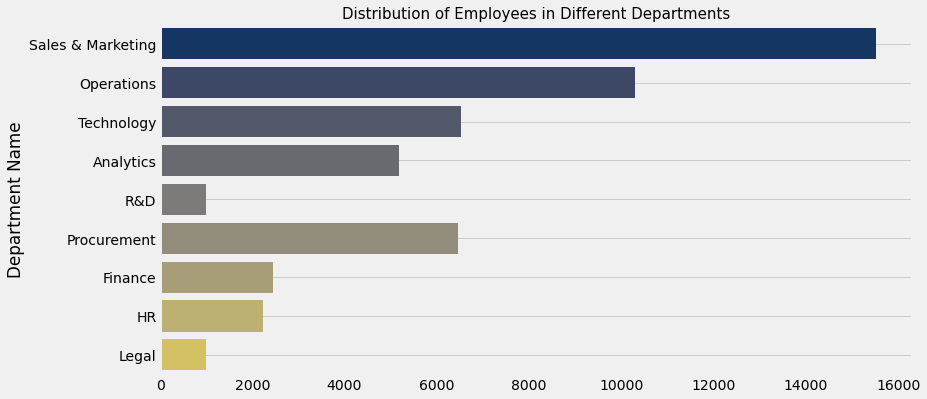

In [30]:
# lets check different Departments
plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = train['department'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

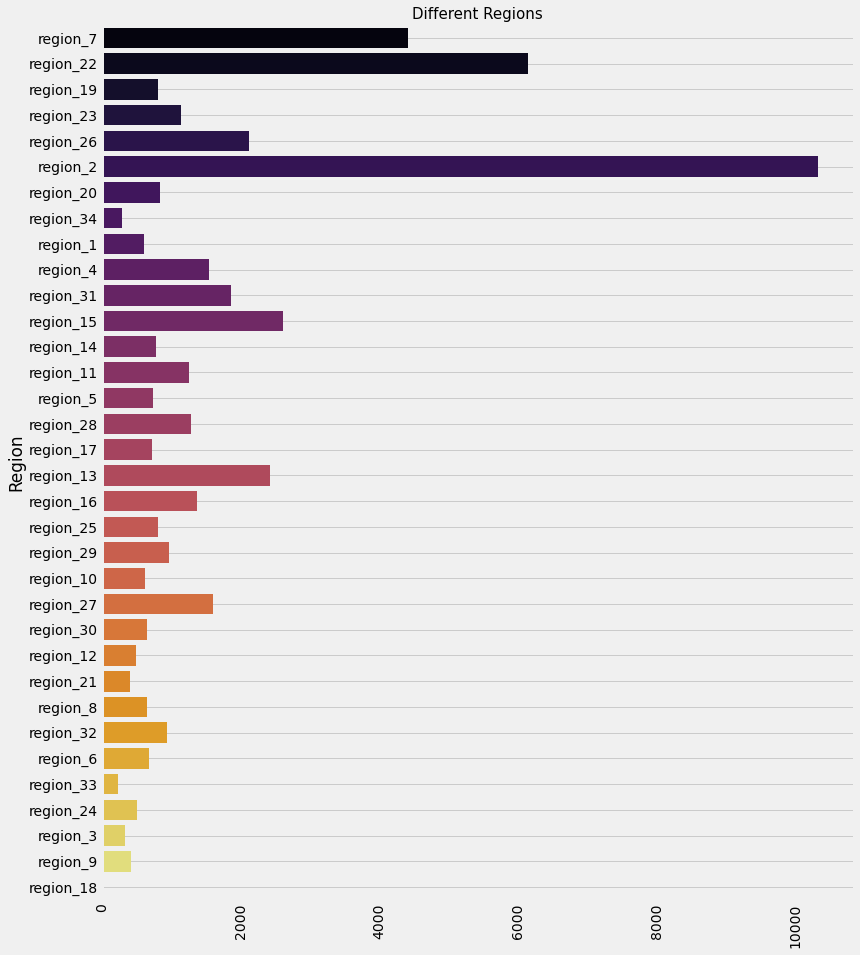

In [31]:
# lets check distribution of different Regions
plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = train['region'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

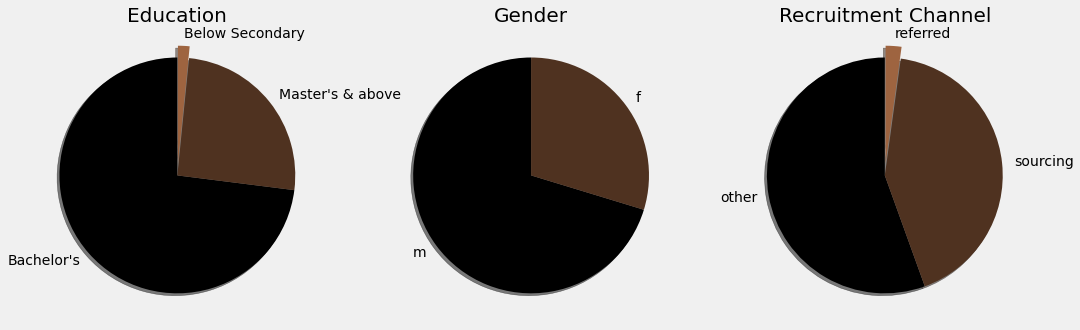

In [32]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,8)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = train['education'].value_counts().index
sizes = train['education'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Education', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
sizes = train['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

* From, the above pie charts displayed for representing Education, Gender, and Recruitment Channel.

* Lets infer the main highlights:-

    * Very Few employees are actually working only after their Secondary Education. 
    * Obviously Females are again in minority as compared to their Male counterparts.
    * And the Recruitment Channel, says that the Referred Employees are very less, i.e., most of the employees are recruited either by sourcing, or some other recruitment agencies, sources etc.

## Bivariate Analysis

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

* Types of Bivariate Analysis
    * Categorical vs Categorical 
    * Categorical vs Numerical
    * Numerical vs Numerical
    
* First, we will perform Categorical vs Categorical Analysis using Stacked and Grouped Bar Charts with the help of crosstab function.
* Second, we will perform Categorical vs Numerical Analysis using Bar Charts, Box plots, Strip plots, Swarm plots, Boxen plots, Violin Plots, etc
* Atlast, we will perform Numerical vs Numerical Analysis using Scatter plots.

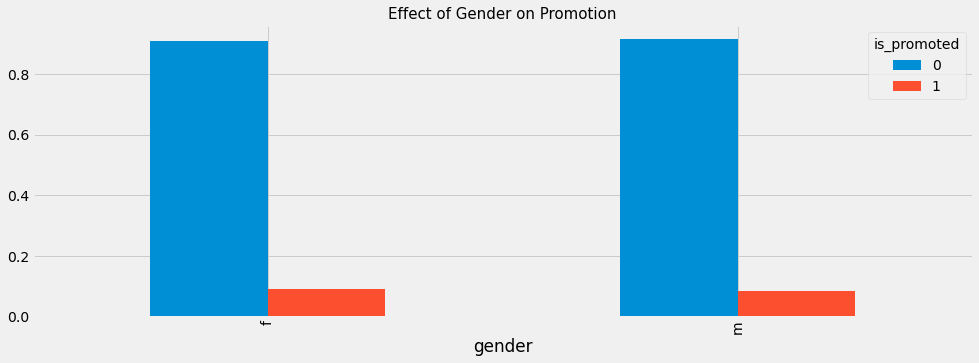

In [33]:
# Lets compare the Gender Gap in the promotion
plt.rcParams['figure.figsize'] = (15, 5)
x = pd.crosstab(train['gender'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False) 
plt.title('Effect of Gender on Promotion', fontsize = 15)
# plt.xlabel(' ')
plt.show()

* As we have already seen that the Females are in minority, but when it comes to promotion, they are competing with their Men counterparts neck-to-neck. That's a great inference.

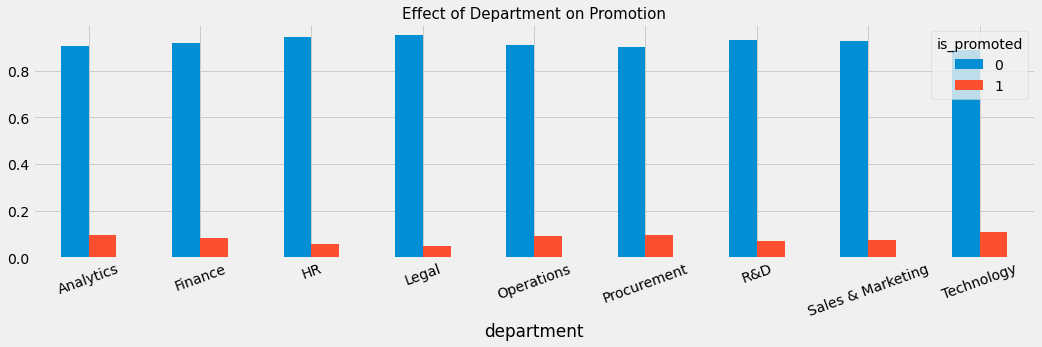

In [34]:
# lets compare the effect of different Departments and Promotion
plt.rcParams['figure.figsize'] = (16,4)
x = pd.crosstab(train['department'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False) 
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
# plt.xlabel(' ')
plt.show()

* From the above plot, its kind of tie amoung the departments when it's come to the their importance. But still there are some difference:
   * The departments HR, Legal have the same importance about (5 to 5.5% employees get promoted).
   * The departments R&D, Sales & Marketing have the same importance about (7% employees get promoted).
   * The departments Analytics, Finance, Operation and Procurement have the same importance about (8.5 to 9.5% employees get      promoted).
   * The department Technology have little more importance about (11% employees get promoted).

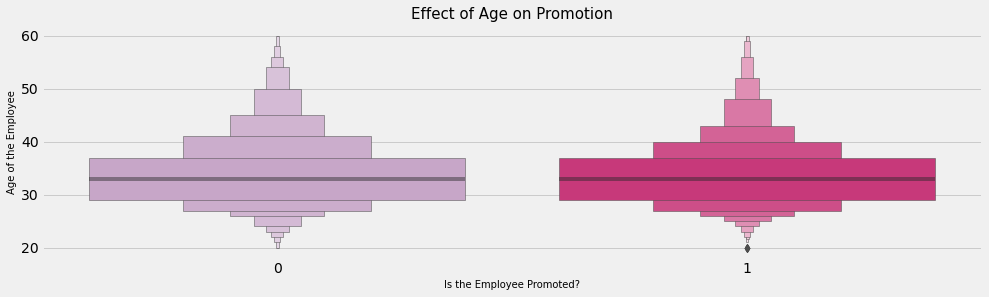

In [35]:
# Effect of Age on the Promotion
plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'], palette = 'PuRd')
# sns.boxplot(train['is_promoted'], train['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

In [36]:
train['age'].min(), train['age'].max()

(20, 60)

In [37]:
# grouping the age column
for i in range(train.shape[0]):
    if train.age[i] in range(20,31):
        train.age[i]='younger'
    elif train.age[i] in range(31,41):
        train.age[i]='middle aged'
    elif train.age[i] in range(41,51):
        train.age[i]='seniors'
    else:
        train.age[i]='super seniors'
        
train['age'] = train['age'].astype('object')    

In [38]:
# value counts on different age group
train['age'].value_counts()

middle aged      25811
younger          18117
seniors           5277
super seniors     1427
Name: age, dtype: int64

In [39]:
# grouping the age column for test data
for i in range(test.shape[0]):
    if test.age[i] in range(20,31):
        test.age[i]='younger'
    elif test.age[i] in range(31,41):
        test.age[i]='middle aged'
    elif test.age[i] in range(41,51):
        test.age[i]='seniors'
    else:
        test.age[i]='super seniors'
        
test['age'] = test['age'].astype('object') 

In [40]:
# value counts on different age group
test['age'].value_counts()

middle aged      11093
younger           7828
seniors           3321
super seniors     1248
Name: age, dtype: int64

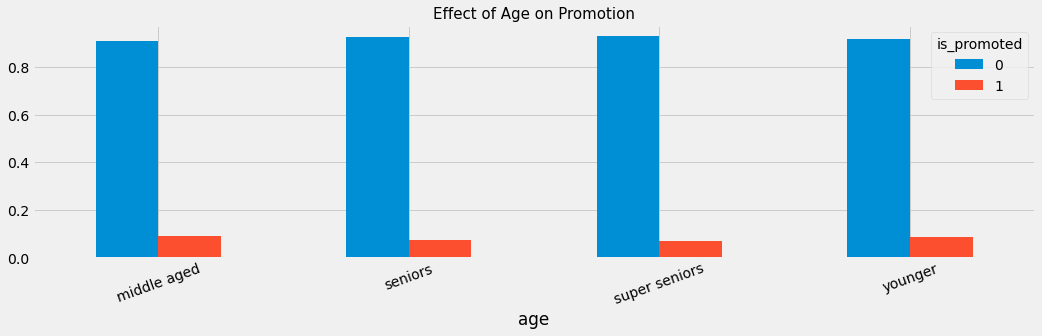

In [41]:
# lets compare the effect of Age of employee and Promotion
plt.rcParams['figure.figsize'] = (16,4)
x = pd.crosstab(train['age'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False) 
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
# plt.xlabel(' ')
plt.show()

* From the above plot, we can see that  younger (20-30) and middle aged (31-40) group of employees having little higher 
  chance of getting promoted as compared to senior and super senior (41-60) group of employees, which is very obvious.

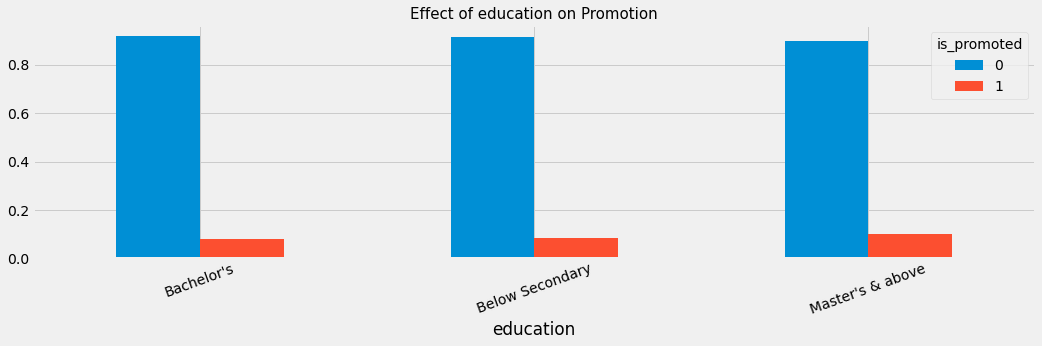

In [42]:
# lets compare the effect of education of employee and Promotion
plt.rcParams['figure.figsize'] = (16,4)
x = pd.crosstab(train['education'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False) 
plt.title('Effect of education on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
# plt.xlabel(' ')
plt.show()

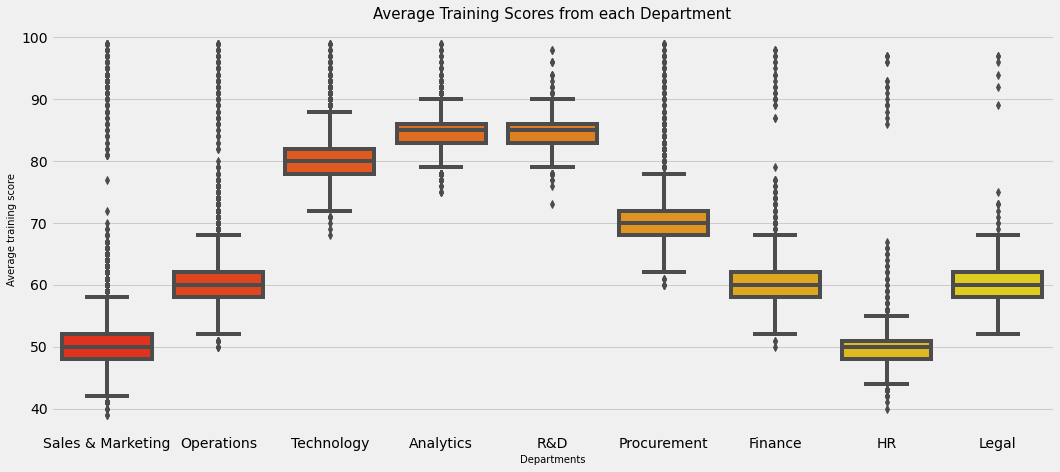

In [43]:
# Department Vs Average Training Score
plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(train['department'], train['avg_training_score'], palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Average training score', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

## Multivariate Analysis

Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

* First, we will use the Correlation Heatmap to check the correlation between the Numerical Columns
* Then we will check the ppscore or the Predictive Score to check the correlation between all the columns present in the data.
* Then, we will use Bubble Charts, split Violin plots, Hue with Bivariate Plots.

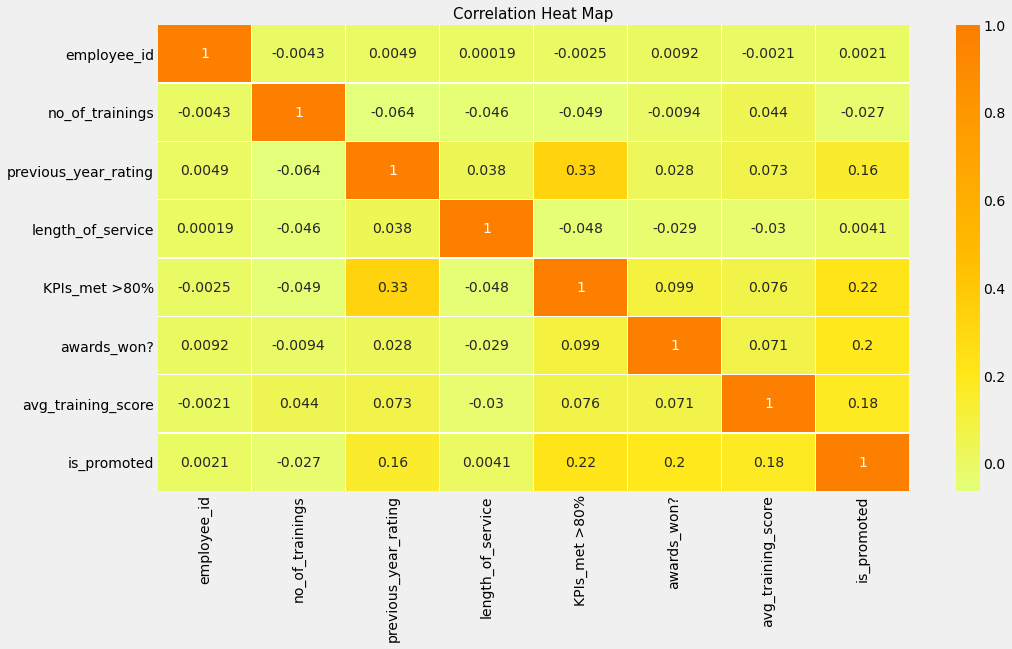

In [44]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

* Here we can see that, most of the features having very low correlation with each other. The features KPIs and Previous_year_rating having little more correlation (0.33), which is acceptable.

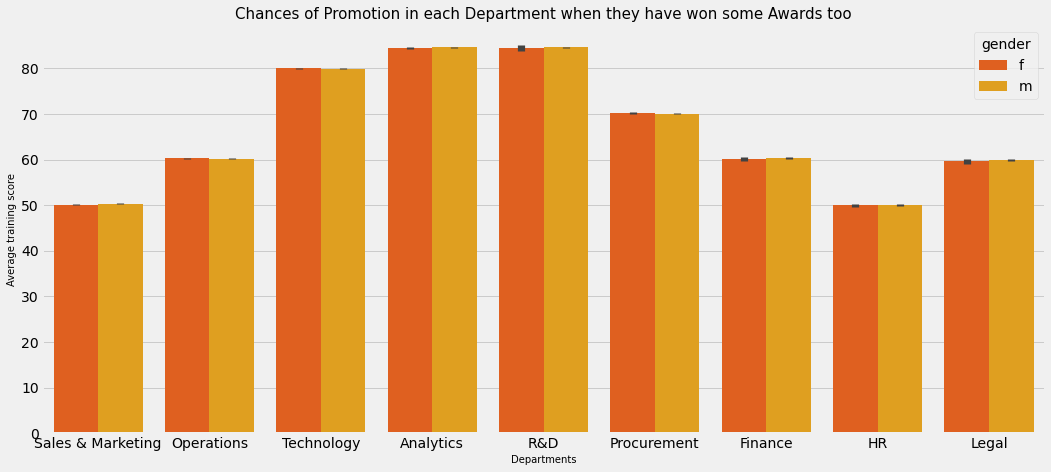

In [45]:
# lets check the relation of Departments and Promotions when they won awards ?
plt.rcParams['figure.figsize'] = (16, 7)
sns.barplot(train['department'], train['avg_training_score'], hue = train['gender'], palette = 'autumn')
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
plt.ylabel('Average training score', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

## Feature Engineering

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.

* There are mutliple ways of performing feature engineering.
* So many people in the Industry consider it the most important step to improve the Model Performance.
* We should always understand the columns well to make some new features using the old existing features.
* Let's discuss the ways how we can perform feature engineering
    * We can perform Feature Engineering by Removing Unnecassary Columns
    * We can do it by Extracting Features from the Date and Time Features.
    * We can do it by Extracting Features from the Categorcial Features.
    * We can do it by Binnning the Numerical and Categorical Features.
    * We can do it by Aggregating Multiple Features together by using simple Arithmetic operations
    
* Here, we are only going to perform Feature Engineering by Aggregating some features together.

In [46]:
# lets create some extra features from existing features to improve our Model

# creating a Metric of Sum
train['sum_metric'] = train['awards_won?']+train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+test['KPIs_met >80%'] + test['previous_year_rating']

# creating a total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [47]:
# lets remove some of the columns which are not very useful for predicting the promotion.

# we already know that the recruitment channel is very least related to promotion of an employee, so lets remove this column
# even the region seems to contribute very less, when it comes to promotion, so lets remove it too.
# also the employee id is not useful so lets remove it.

train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

# lets check the columns in train and test data set after feature engineering
train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score'],
      dtype='object')

In [48]:
train.shape, test.shape

((50632, 13), (23490, 12))

In [49]:
'''
lets check the no. of employee who did not get an award, did not acheive 80+ KPI, previous_year_rating as 1
and avg_training score is less than 40
but, still got promotion.
''' 

train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
29434,Sales & Marketing,Bachelor's,m,1,younger,1.0,2,0,0,58,1,1.0,58
47448,Sales & Marketing,Bachelor's,m,1,middle aged,1.0,5,0,0,58,1,1.0,58


In [50]:
# lets remove the above two columns as they have a huge negative effect on our training data

# lets check shape of the train data before deleting two rows
print("Before Deleting the above two rows :", train.shape)

train = train.drop(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

# lets check the shape of the train data after deleting the two rows
print("After Deletion of the above two rows :", train.shape)

Before Deleting the above two rows : (50632, 13)
After Deletion of the above two rows : (50630, 13)


## Dealing with Categorical Columns

Categorical variables are known to hide and mask lots of interesting information in a data set. It’s crucial to learn the methods of dealing with such variables. If you won’t, many a times, you’d miss out on finding the most important variables in a model. It has happened with me. Initially, I used to focus more on numerical variables. Hence, never actually got an accurate model. But, later I discovered my flaws and learnt the art of dealing with such variables.

* There are various ways to encode categorical columns into Numerical columns
* This is an Essential Step, as we Machine Learning Models only works with Numerical Values.
* Here, we are going to use Business Logic to encode the education column
* Then we will use the Label Encoder, to Department and Gender Columns

In [51]:
## Lets check the categorical columns present in the data
train.select_dtypes('object').head()

,department,education,gender,age
0,Sales & Marketing,Master's & above,f,middle aged
1,Operations,Bachelor's,m,younger
2,Sales & Marketing,Bachelor's,m,middle aged
3,Sales & Marketing,Bachelor's,m,middle aged
4,Technology,Bachelor's,m,seniors


In [52]:
train.department.value_counts()

Sales & Marketing    15517
Operations           10297
Technology            6520
Procurement           6463
Analytics             5187
Finance               2447
HR                    2226
Legal                  988
R&D                    985
Name: department, dtype: int64

In [53]:
# lets check the value counts for the education column
train['age'].value_counts()

middle aged      25810
younger          18116
seniors           5277
super seniors     1427
Name: age, dtype: int64

In [54]:
# lets start encoding these categorical columns to convert them into numerical columns

# lets encode the education in their degree of importance 
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

# lets encode the department column according to their importance
train['department'] = train['department'].replace(("HR", "Legal", "R&D", "Sales & Marketing", "Analytics", "Finance",
                                                   "Operations", "Procurement", "Technology"),(1,1,2,2,3,3,3,3,4))
                                                
test['department'] = test['department'].replace(("HR", "Legal", "R&D", "Sales & Marketing", "Analytics", "Finance",
                                                   "Operations", "Procurement", "Technology"),(1,1,2,2,3,3,3,3,4))

# lets encode the age group according to their importance
train['age'] = train['age'].replace(("younger", "middle aged", "seniors", "super seniors"), (2,2,1,1))
test['age'] = test['age'].replace(("younger", "middle aged", "seniors", "super seniors"), (2,2,1,1))
                                                

In [55]:
# As we have see the gender does not matter in case of get promoted I am dropping the gender column from 
# both train and test data
train = train.drop("gender", axis=1)
test = test.drop("gender", axis=1)

In [56]:
# lets check whether we still have any categorical columns left after encoding
print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [57]:
# lets check the data after encoding
train.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,2,3,1,2,5.0,8,1,0,49,0,6.0,49
1,3,2,1,2,5.0,4,0,0,60,0,5.0,60
2,2,2,1,2,3.0,7,0,0,50,0,3.0,50
3,2,2,2,2,1.0,10,0,0,50,0,1.0,100
4,4,2,1,1,3.0,2,0,0,73,0,3.0,73


## Splitting the Data

This is one of the most Important step to perform Machine Learning Prediction on a Dataset,
We have to separate the Target and Independent Columns.
* We store the Target Variable in y, and then we store the rest of the columns in x, by deleting the target column from the data
* Also, we are changing the name of test dataset to x_test for ease of understanding.

In [58]:
# lets split the target data from the train data

y = train['is_promoted']
X = train.drop(['is_promoted'], axis = 1)
X_test = test

# lets print the shapes of these newly formed data sets
print("Shape of the x :", X.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", X_test.shape)

Shape of the x : (50630, 11)
Shape of the y : (50630,)
Shape of the x Test : (23490, 11)


## Resampling

Resampling is the method that consists of drawing repeated samples from the original data samples. The method of Resampling is a nonparametric method of statistical inference.

* Earlier, in this Problem we noticed that the Target column is Highly Imbalanced, we need to balance the data by using some Statistical Methods.
* There are many Statistical Methods we can use for Resampling the Data such as:
    * Over Samping
    * Cluster based Sampling
    * Under Sampling.
    
Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set. These terms are used both in statistical sampling, survey design methodology and in machine learning. Oversampling and undersampling are opposite and roughly equivalent techniques
    
* We are going to use Over Sampling. 
* We will not use Under Sampling to avoid data loss.

In [59]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here we are going to use Combination of over sampling and under sampling method.
from imblearn.combine import SMOTEENN

In [60]:
# defining the model
smteen = SMOTEENN(random_state=0)

# training the model
smteen.fit(X, y.values.ravel())

#making the samples
X_resample, y_resample = smteen.fit_resample(X, y.values.ravel())

# lets print the shape of x and y after resampling it
print(X_resample.shape)
print(y_resample.shape)

(72509, 11)
(72509,)


In [61]:
# lets also check the value counts of our target variable4

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    46252
1     4378
Name: is_promoted, dtype: int64
After Resampling :
1    36334
0    36175
Name: 0, dtype: int64


In [111]:
# y_resample.values.ravel()

In [62]:
# lets create a validation set from the training data so that we can check whether the model that we have created is good enough
# lets import the train_test_split library from sklearn to do that
from sklearn.model_selection import train_test_split

In [63]:

X_train, X_valid, y_train, y_valid = train_test_split(X_resample, y_resample, test_size = 0.2,
                                                      random_state = 1)

# lets print the shapes again 
print("Shape of the x Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", X_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", X_test.shape)

Shape of the x Train : (58007, 11)
Shape of the y Train : (58007, 1)
Shape of the x Valid : (14502, 11)
Shape of the y Valid : (14502, 1)
Shape of the x Test : (23490, 11)


## Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step
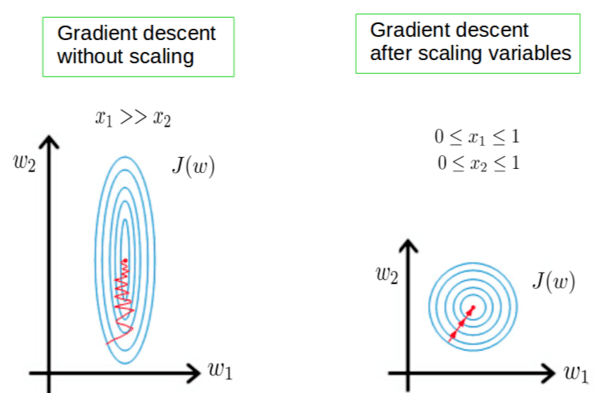

In [79]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.
# lets import the standard scaler library from sklearn to do that

from sklearn.preprocessing import StandardScaler

In [90]:
sc = StandardScaler()
X_trains = sc.fit_transform(X_train)
X_valids = sc.transform(X_valid)
X_tests = sc.transform(X_test)


##  Machine Learning Predictive Modelling

Predictive modeling is a process that uses data and statistics to predict outcomes with data models. These models can be used to predict anything from sports outcomes and TV ratings to technological advances and corporate earnings. Predictive modeling is also often referred to as: Predictive analytics.



### Decision Tree Classifier

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

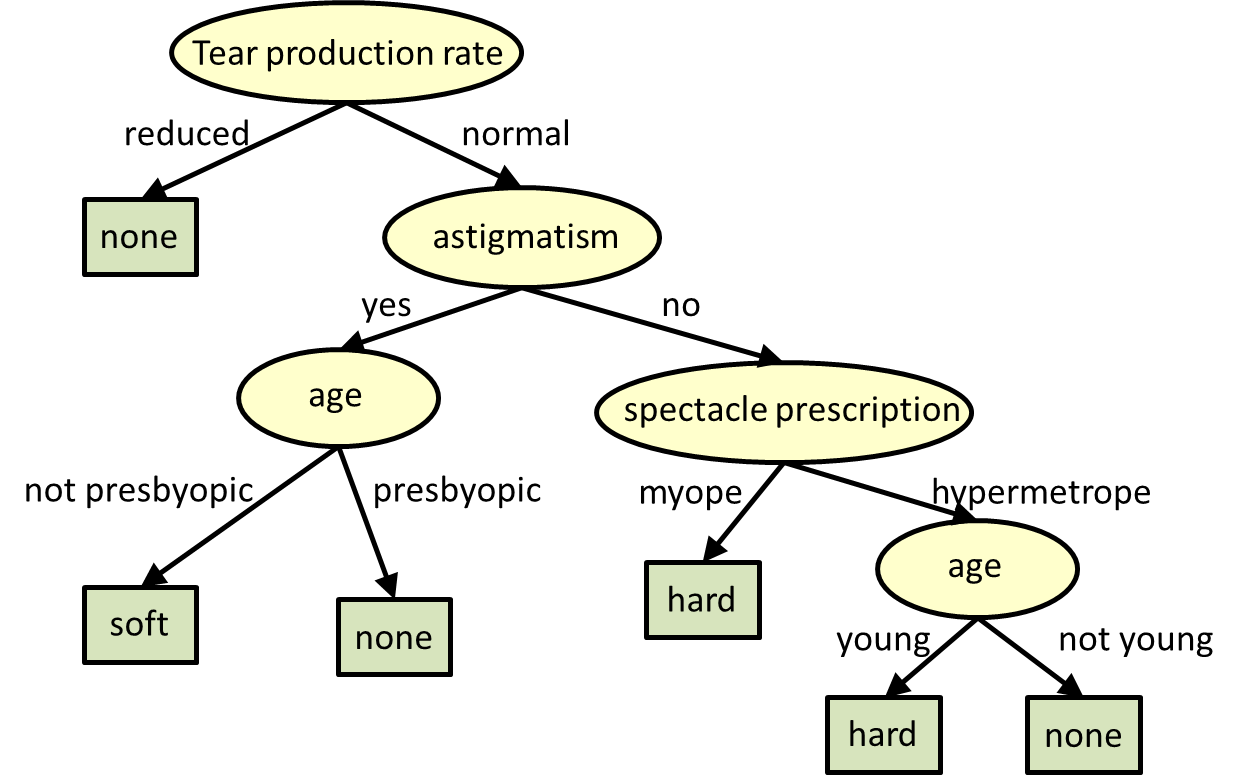

In [77]:
# lets import required library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.tree import plot_tree

In [65]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

In [66]:
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)[:,1]

y_valid_pred = model.predict(X_valid)
y_valid_prob = model.predict_proba(X_valid)[:,1]


print('Train-Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Train-AUC: ', roc_auc_score(y_train, y_train_prob))

print('\n')
print('Valid-Accuracy: ', accuracy_score(y_valid, y_valid_pred))
print('Valid-AUC: ', roc_auc_score(y_valid, y_valid_prob))

Train-Accuracy:  0.9828813763856087
Train-AUC:  0.9992840439698569


Valid-Accuracy:  0.9606950765411667
Valid-AUC:  0.9791150272450659


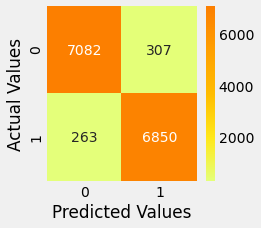

In [67]:
# ploting confusion matrix
cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [68]:
# lets take a look at the Classification Report
cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7389
           1       0.96      0.96      0.96      7113

    accuracy                           0.96     14502
   macro avg       0.96      0.96      0.96     14502
weighted avg       0.96      0.96      0.96     14502



In [143]:
# plt.figure(figsize=(60,30))
# plot_tree(model, feature_names = X_train.columns, filled=True);

##### Hyperparameter Tuning

In [89]:
# range(randint(10, 500))

In [69]:
tune_model = DecisionTreeClassifier(random_state = 47)

param_dist = {'max_depth': randint(2, 20),
              'min_samples_leaf': randint(2, 100),
              'max_leaf_nodes' : randint(2, 100),
              'min_samples_split': randint(10, 500),
              'criterion': ['entropy', 'gini']}

rsearch = RandomizedSearchCV(tune_model, param_distributions = param_dist, scoring = 'recall', 
                             cv = 5, n_iter = 2000, random_state = 47)

rsearch.fit(X_resample, y_resample)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=47),
                   n_iter=2000,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015884AF7220>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015882CC2F70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015884AF7640>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015880A53490>},
                   random_state=47, scoring='recall')

In [70]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_leaf_nodes': 80,
 'min_samples_leaf': 19,
 'min_samples_split': 142}

In [71]:
pd.DataFrame(rsearch.cv_results_).iloc[:,4:]

,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,gini,8,73,10,82,"{'criterion': 'gini', 'max_depth': 8, 'max_lea...",0.876565,0.907390,0.938902,0.913995,0.933664,0.914103,0.022144,1399
1,gini,18,25,61,218,"{'criterion': 'gini', 'max_depth': 18, 'max_le...",0.909041,0.922664,0.936700,0.942893,0.947013,0.931662,0.013999,931
2,gini,9,47,57,60,"{'criterion': 'gini', 'max_depth': 9, 'max_lea...",0.925554,0.919224,0.946470,0.945232,0.942059,0.935708,0.011151,789
3,entropy,13,67,89,389,"{'criterion': 'entropy', 'max_depth': 13, 'max...",0.905463,0.944957,0.950736,0.926930,0.952519,0.936121,0.017804,750
4,entropy,10,43,67,63,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.924178,0.932572,0.935186,0.953901,0.954721,0.940112,0.012154,526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,gini,2,18,92,125,"{'criterion': 'gini', 'max_depth': 2, 'max_lea...",0.870098,0.891427,0.908353,0.886335,0.910680,0.893379,0.014960,1611
1996,entropy,4,71,45,416,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.904362,0.921563,0.925691,0.923077,0.927470,0.920433,0.008291,1294
1997,gini,17,69,73,381,"{'criterion': 'gini', 'max_depth': 17, 'max_le...",0.914683,0.943443,0.945920,0.951699,0.941921,0.939533,0.012863,547
1998,entropy,14,4,73,267,"{'criterion': 'entropy', 'max_depth': 14, 'max...",0.870098,0.891427,0.894042,0.886335,0.895679,0.887516,0.009266,1724


In [97]:
best_params = {'criterion': 'entropy',
 'max_depth': 9,
 'max_leaf_nodes': 80,
 'min_samples_leaf': 19,
 'min_samples_split': 142}

best_params

{'criterion': 'entropy',
 'max_depth': 9,
 'max_leaf_nodes': 80,
 'min_samples_leaf': 19,
 'min_samples_split': 142}

In [98]:
decision_tree = DecisionTreeClassifier(**best_params, random_state = 1)
decision_tree.fit(X_trains, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=80,
                       min_samples_leaf=19, min_samples_split=142,
                       random_state=1)

In [99]:
y_train_pred = decision_tree.predict(X_trains)
y_train_prob = decision_tree.predict_proba(X_trains)[:,1]

y_valid_pred = decision_tree.predict(X_valids)
y_valid_prob = decision_tree.predict_proba(X_valids)[:,1]


print('Train-Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Train-AUC: ', roc_auc_score(y_train, y_train_prob))

print('\n')
print('Valid-Accuracy: ', accuracy_score(y_valid, y_valid_pred))
print('Valid-AUC: ', roc_auc_score(y_valid, y_valid_prob))

Train-Accuracy:  0.8817039322840347
Train-AUC:  0.9553484078725372


Valid-Accuracy:  0.8791201213625707
Valid-AUC:  0.9550229092808915


In [100]:
# lets take a look at the Classification Report
cr = classification_report(y_valid, y_valid_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      7389
           1       0.83      0.96      0.89      7113

    accuracy                           0.88     14502
   macro avg       0.89      0.88      0.88     14502
weighted avg       0.89      0.88      0.88     14502



In [76]:
# plt.figure(figsize=(60,30))
# plot_tree(decision_tree, feature_names = X_train.columns, filled=True);

In [101]:
model = Pipeline([('ss', StandardScaler()),
                   ('rfc', RandomForestClassifier(random_state = 1, n_jobs = -1))])

param_dist = {'rfc__n_estimators': randint(20, 250),
              'rfc__max_depth': randint(2, 20),
              'rfc__min_samples_leaf': randint(10, 100),
              'rfc__criterion': ['entropy', 'gini']}

rsearch_rnf = RandomizedSearchCV(model, param_distributions = param_dist, scoring='accuracy', 
                             cv = 5, n_iter = 500, random_state = 1)
rsearch_rnf.fit(X_resample, y_resample)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ss', StandardScaler()),
                                             ('rfc',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=1))]),
                   n_iter=500,
                   param_distributions={'rfc__criterion': ['entropy', 'gini'],
                                        'rfc__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015880A66D60>,
                                        'rfc__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015882C58CA0>,
                                        'rfc__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015884B42AF0>},
                   random_state=1, scoring='accuracy')

In [102]:
rsearch_rnf.best_params_

{'rfc__criterion': 'entropy',
 'rfc__max_depth': 18,
 'rfc__min_samples_leaf': 10,
 'rfc__n_estimators': 62}

In [103]:
pd.DataFrame(rsearch.cv_results_).iloc[:,4:]

,param_rfc__criterion,param_rfc__max_depth,param_rfc__min_samples_leaf,param_rfc__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,gini,8,73,28,"{'rfc__criterion': 'gini', 'rfc__max_depth': 8...",0.868156,0.878844,0.875259,0.878568,0.876629,0.875491,0.003895,142
1,entropy,18,25,79,"{'rfc__criterion': 'entropy', 'rfc__max_depth'...",0.892773,0.904841,0.903048,0.909392,0.910006,0.904012,0.006210,17
2,entropy,9,73,193,"{'rfc__criterion': 'entropy', 'rfc__max_depth'...",0.873121,0.881258,0.877189,0.886085,0.881870,0.879905,0.004411,132
3,gini,13,67,107,"{'rfc__criterion': 'gini', 'rfc__max_depth': 1...",0.877672,0.887533,0.884981,0.893463,0.890490,0.886828,0.005388,86
4,gini,10,43,85,"{'rfc__criterion': 'gini', 'rfc__max_depth': 1...",0.878224,0.886223,0.885257,0.892704,0.887318,0.885945,0.004642,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,entropy,2,24,37,"{'rfc__criterion': 'entropy', 'rfc__max_depth'...",0.792029,0.806440,0.804786,0.805751,0.808496,0.803500,0.005864,193
196,entropy,5,73,232,"{'rfc__criterion': 'entropy', 'rfc__max_depth'...",0.837609,0.847125,0.843815,0.847814,0.849872,0.845247,0.004287,164
197,entropy,18,78,223,"{'rfc__criterion': 'entropy', 'rfc__max_depth'...",0.879051,0.891256,0.886705,0.893739,0.892214,0.888593,0.005316,72
198,gini,4,56,38,"{'rfc__criterion': 'gini', 'rfc__max_depth': 4...",0.812853,0.826438,0.822576,0.825541,0.830425,0.823567,0.005915,176


In [112]:
best_params = {'criterion': 'gini',
 'max_depth': 18,
 'min_samples_leaf': 3,
 'n_estimators': 176}
best_params # best params.

{'criterion': 'gini',
 'max_depth': 18,
 'min_samples_leaf': 3,
 'n_estimators': 176}

In [115]:
rnf_clf = RandomForestClassifier(**best_params, random_state = 1, n_jobs = -1)
rnf_clf.fit(X_trains, y_train)

RandomForestClassifier(max_depth=18, min_samples_leaf=3, n_estimators=176,
                       n_jobs=-1, random_state=1)

In [116]:
y_train_pred = rnf_clf.predict(X_trains)
y_train_prob = rnf_clf.predict_proba(X_trains)[:,1]

y_valid_pred = rnf_clf.predict(X_valids)
y_valid_prob = rnf_clf.predict_proba(X_valids)[:,1]


print('Train-Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Train-AUC: ', roc_auc_score(y_train, y_train_prob))

print('\n')
print('Test-Accuracy: ', accuracy_score(y_valid, y_valid_pred))
print('Test-AUC: ', roc_auc_score(y_valid, y_valid_prob))

Train-Accuracy:  0.9554019342493147
Train-AUC:  0.9947652492058348


Test-Accuracy:  0.9418700868845676
Test-AUC:  0.9906514060278256


In [111]:
cr = classification_report(y_valid, y_valid_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      7389
           1       0.92      0.97      0.94      7113

    accuracy                           0.94     14502
   macro avg       0.94      0.94      0.94     14502
weighted avg       0.94      0.94      0.94     14502



## Day 5 

In the Started our Data Science Journey on Day 2, Today is the last day of our Data Science Journey. Today we will learn how to perform Real Time Predictions using the Model which we have created yesterday.

So, lets get started, 
* First, we we will check the descriptive summary of the data again, so that we can analyze the columns and values which we can provide to the Model as Input and expect the Model to return Output whether the Employee should get a promotion or not.

* Then we will define the value for which we want the predction, and then finally we will predict the values.

## Real Time Prediction

In [63]:
train.describe()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
count,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000
mean,4.972722,2.257636,0.702368,1.250684,34.804127,3.304565,5.865599,0.351987,0.023173,63.386947,0.085137,3.679725,79.771430
std,2.506061,0.469723,0.457221,0.589462,7.660219,1.214712,4.265138,0.477594,0.150453,13.371764,0.279088,1.463326,43.879739
min,0.000000,1.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,1.000000,39.000000
25%,4.000000,2.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,3.000000,53.000000
50%,5.000000,2.000000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,4.000000,64.000000
75%,7.000000,3.000000,1.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,5.000000,84.000000
max,8.000000,3.000000,1.000000,5.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,7.000000,710.000000


In [65]:
prediction = rfecv.predict(np.array([[2, #department code
                                      3, #masters degree
                                      1, #male
                                      1, #1 training
                                      30, #30 years old
                                      5, #previous year rating
                                      10, #length of service
                                      1, #KPIs met >80%
                                      1, #awards won
                                      95, #avg training score
                                      7, #sum of metric 
                                      700 #total score
                                     ]]))

print("Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion :", prediction)

Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion : [1]


**Here comes to an end to this session, where we predicted whether an employee belonging to an organization should get a promotion or not using Logistic Regression and Decision Trees.**

**We also used Feature Selection, and Hyper Parameter Tuning to Improve the Model**.

**This is the end of this Project, Now lets understand how to present this project to a client or Managers using Presentations, Reports, Conclussions, and Visualizations**

